# Kaggle challenge: Predicting house prices in Iowa

$\textbf{Author:}$ Alan Akil

$\textbf{Link to dataset:}$ https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In this project, we will create a model that based on house features predicts the price of the house in Ames, Iowa.

Here, I will go over nearly all the steps in the modelling process. Some of things I did include:

- Dealing with missing/nan values.
- Simple EDA plotting some variables.
- Dealing with outliers.
- Transformation of data.
- Dealing with multicollinearity and using feature selection.
- Training a number of predictive models on the dataset and assessing model performance.

In [1]:
# Import all necessary packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

Let's first load the dataset and start Exploratory Data Analysis.

In [2]:
# Load dataset.
df = pd.read_csv('./train.csv')
df = pd.DataFrame(df)

In [3]:
# Show number of rows and columns
df.shape

(1460, 81)

There are 1460 observations and 81 columns, i.e., 80 features and the target variable (price). Here's a list of them and what they mean.

- SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [4]:
# Show some summary statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Find which variables are continuous (numerical) and which are categorical.

In [6]:
# Find continuous and categorical variables
categorical, numerical = [],[]
for z in df.columns:
    t = df.dtypes[z]
    if t=='object':
        categorical.append(z)
    else:
        numerical.append(z)
print("Categorical:\n{}".format(categorical))
print("\nNumerical:\n{}".format(numerical))

print('\nNumerical Features: {}'.format(len(numerical)))
print('Categorical Features: {}'.format(len(categorical)))

Categorical:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Numerical:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Wood

In [7]:
# Finding the unique values in each categorical column (type object)
for col in df.select_dtypes('O').columns:
    print('We have {} unique values in {} column : {}'.format(len(df[col].unique()),col,df[col].unique()))
    print('-'*80)

We have 5 unique values in MSZoning column : ['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------------------------------------
We have 2 unique values in Street column : ['Pave' 'Grvl']
--------------------------------------------------------------------------------
We have 3 unique values in Alley column : [nan 'Grvl' 'Pave']
--------------------------------------------------------------------------------
We have 4 unique values in LotShape column : ['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------------------------------------
We have 4 unique values in LandContour column : ['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------------------------------------
We have 2 unique values in Utilities column : ['AllPub' 'NoSeWa']
--------------------------------------------------------------------------------
We have 5 unique values in LotConfig column : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
-----------------

Print the number of unique values in each categorical variable.

In [8]:
print('Categorical columns Unique values count\n')
for col in categorical:
    print(col,'-'*(20-len(col)),'>',len(df[col].unique()))

Categorical columns Unique values count

MSZoning ------------ > 5
Street -------------- > 2
Alley --------------- > 3
LotShape ------------ > 4
LandContour --------- > 4
Utilities ----------- > 2
LotConfig ----------- > 5
LandSlope ----------- > 3
Neighborhood -------- > 25
Condition1 ---------- > 9
Condition2 ---------- > 8
BldgType ------------ > 5
HouseStyle ---------- > 8
RoofStyle ----------- > 6
RoofMatl ------------ > 8
Exterior1st --------- > 15
Exterior2nd --------- > 16
MasVnrType ---------- > 5
ExterQual ----------- > 4
ExterCond ----------- > 5
Foundation ---------- > 6
BsmtQual ------------ > 5
BsmtCond ------------ > 5
BsmtExposure -------- > 5
BsmtFinType1 -------- > 7
BsmtFinType2 -------- > 7
Heating ------------- > 6
HeatingQC ----------- > 5
CentralAir ---------- > 2
Electrical ---------- > 6
KitchenQual --------- > 4
Functional ---------- > 7
FireplaceQu --------- > 6
GarageType ---------- > 7
GarageFinish -------- > 4
GarageQual ---------- > 6
GarageCond ---------

# Missing data

Let's now check if there is missing data and address this issue.

In [9]:
# Find categorical features with Nan values.
variable = [feature for feature in categorical if df[feature].isnull().sum()]
# Calculate the percentage of nan values.
for feature in variable:
    print("{}: {}%".format(feature,np.round(df[feature].isnull().mean(),3)))

Alley: 0.938%
MasVnrType: 0.005%
BsmtQual: 0.025%
BsmtCond: 0.025%
BsmtExposure: 0.026%
BsmtFinType1: 0.025%
BsmtFinType2: 0.026%
Electrical: 0.001%
FireplaceQu: 0.473%
GarageType: 0.055%
GarageFinish: 0.055%
GarageQual: 0.055%
GarageCond: 0.055%
PoolQC: 0.995%
Fence: 0.808%
MiscFeature: 0.963%


In [10]:
# Find numerical features with Nan values.
variable = [feature for feature in numerical if df[feature].isnull().sum()]
for feature in variable:
    print("{}: {}%".format(feature,np.round(df[feature].isnull().mean(),3)))

LotFrontage: 0.177%
MasVnrArea: 0.005%
GarageYrBlt: 0.055%


Let's take care of this. When the value is missing for a miscellanous feature, we will put a 'None'.

Sometimes there is no basement, so we will give 'None' to those cases too.

If there is no basement, we will give a zero to related numerical variables.

We do the same thing with variables related to garage.

In all other categorical variables will use the mode.

In [11]:
# Let's replace the nan with None for categorical vars

# Meaning that there is no Miscellaneous feature.
df.fillna({'Alley': 'None', 'Fence':'None', 'MiscFeature':'None', 
           'PoolQC':'None', 'FireplaceQu':'None', 'MasVnrType':'None'}, inplace = True)

# Meaning that there is no basement.
df.fillna({'BsmtQual':'None', 'BsmtCond':'None',
           'BsmtExposure':'None', 'BsmtFinType1':'None',
           'BsmtFinType2':'None'},inplace=True)

# Missing Basement Columns(Numerical)
Bsmt_con = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath','BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF']

# If there is no basement, give 0 to any characteristic of a basement (# of baths, etc.)
for Bsmt in Bsmt_con:
    df[Bsmt].fillna(0, inplace=True) 
    
# missing Garage columns(Categorical)
df.fillna({'GarageType':'None','GarageCond': 'None', 'GarageQual':'None', 
           'GarageQual':'None', 'GarageFinish': 'None'}, inplace=True)

# Missing Garage Columns(Numerical)
df.fillna({'GarageCars':0, 'GarageArea': 0}, inplace = True)

# Replacing all other categorical variable with its mode
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())


df['Exterior1st'].fillna('Other' ,inplace=True)
df['Exterior2nd'].fillna('Other' ,inplace=True)

# Multicollinearity

The first model that we will test is linear regression. 
So the first thing we need to test is for multicollinearity (i.e., correlations between variables).

In [12]:
corr = df.corr()
corr.sort_values(['SalePrice'], ascending= False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

 The predictors above with high correlations w.r.t to our target price should be good predictors.

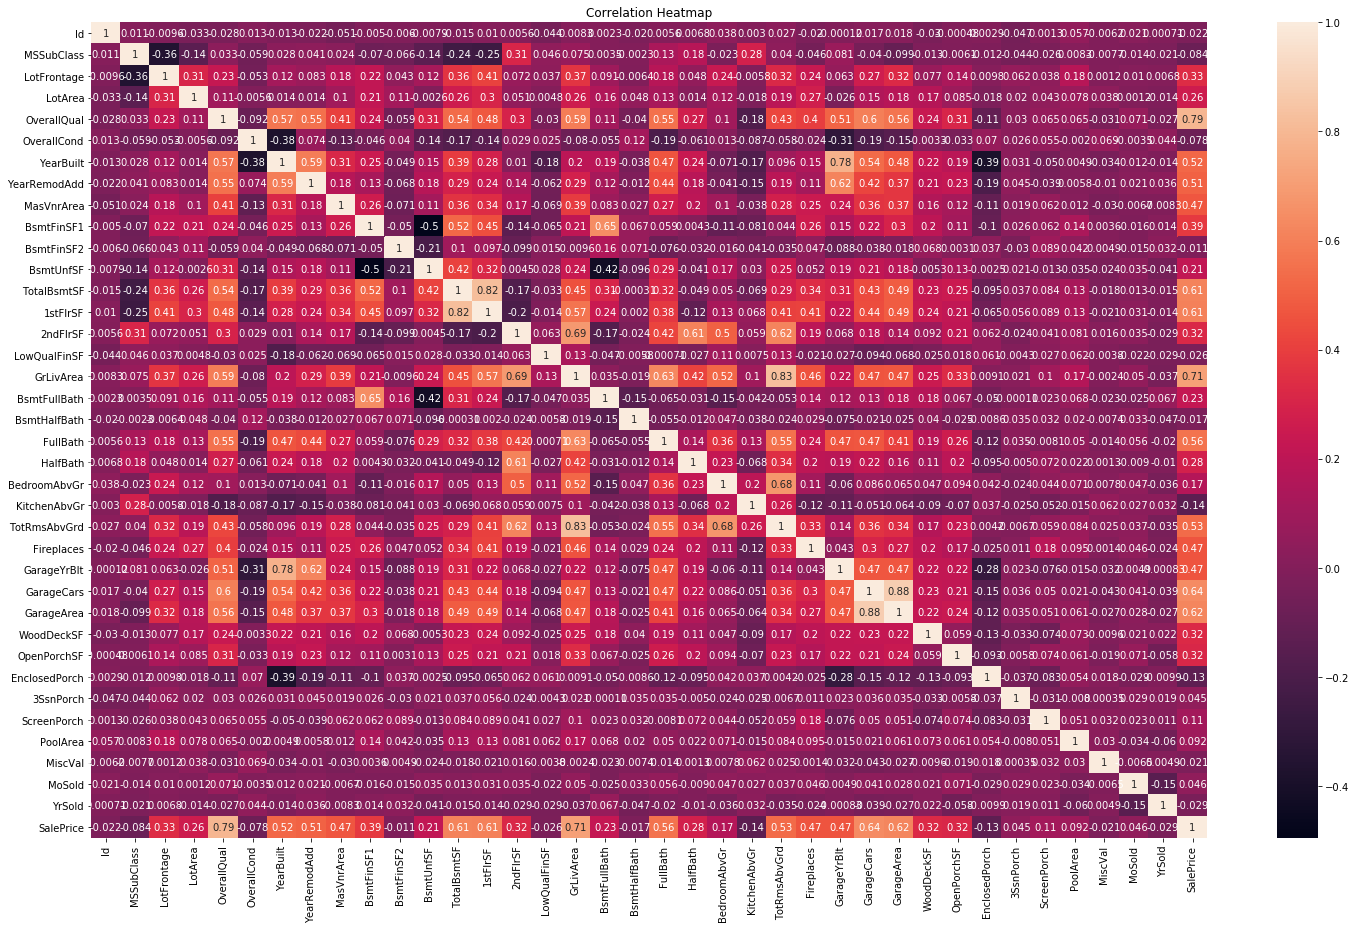

In [13]:
plt.figure(figsize=(25, 15))
corr = df.corr()
heatmap = sns.heatmap(corr, annot = True)
heatmap.set_title('Correlation Heatmap');

There are a number of variables that are highly correlated so they would provide redundant information to our model. None of them have correlation values above 0.9 so we will leave them for now and take care of them during feature selection.

# Plotting

Let's make some plots to see the relationship of some variables to the target variable.

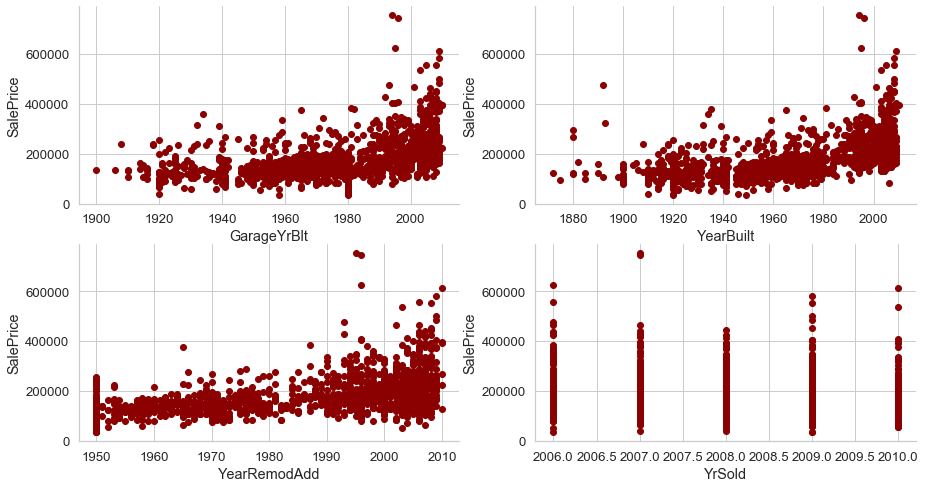

In [14]:
year_features = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']

plt.figure(figsize=(15, 8))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(year_features):
    plt.subplot(2, 2, i+1)
    plt.scatter(data=df, x=features, y='SalePrice', color ="darkred")  
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    
sns.despine()

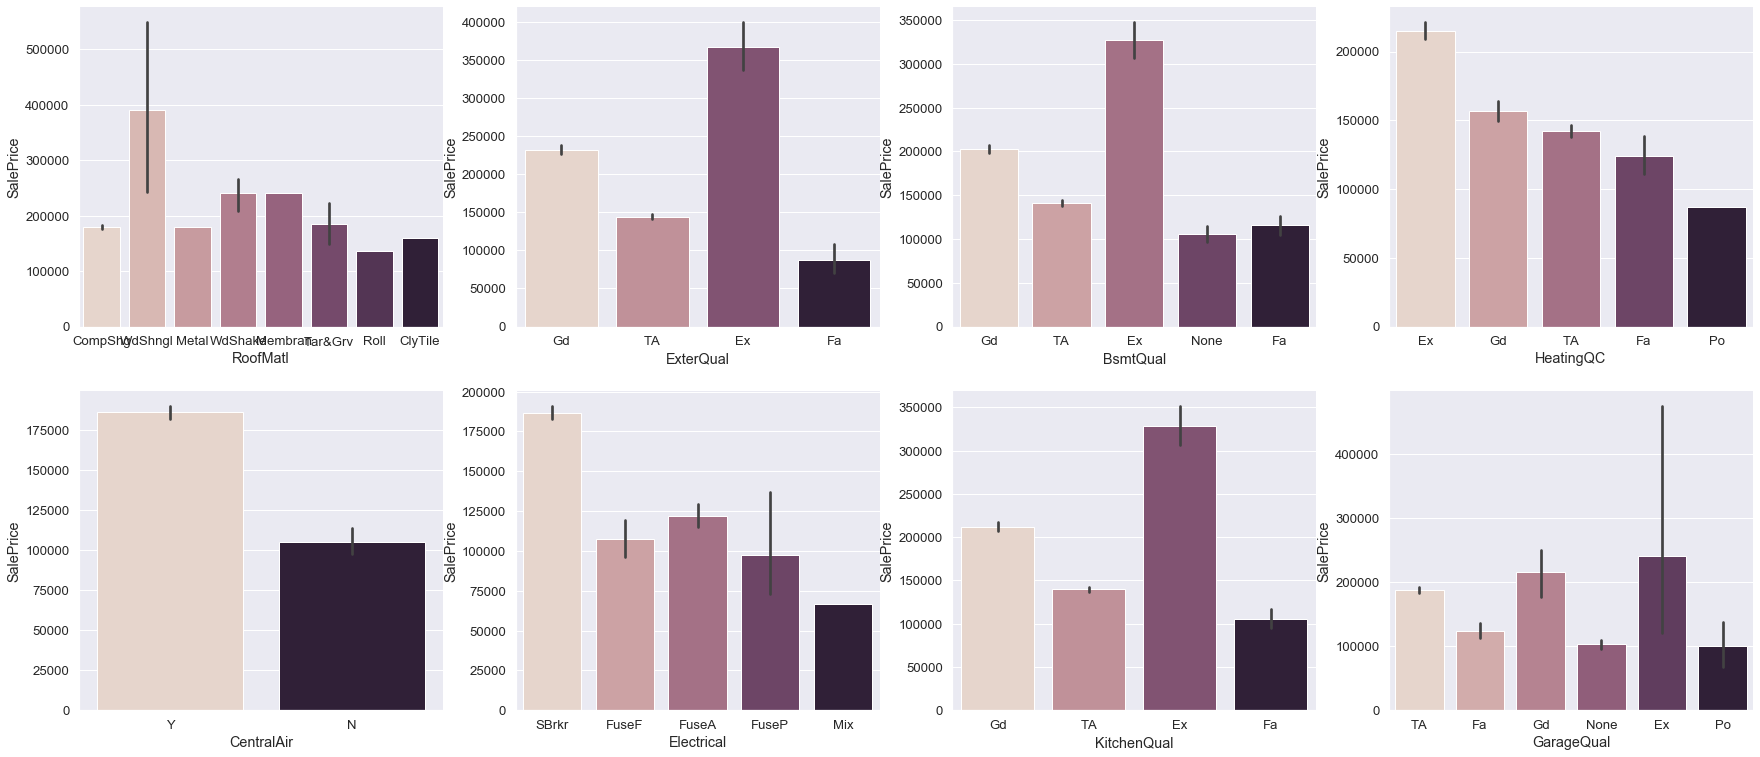

In [15]:
Quality_features = [ 'RoofMatl', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageQual']

plt.figure(figsize=(30, 20))
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')

for i, feature in enumerate(Quality_features):
    plt.subplot(3, 4, i+1)
    sns.barplot(data=df, x=feature, y='SalePrice', palette="ch:.10")  

sns.despine()

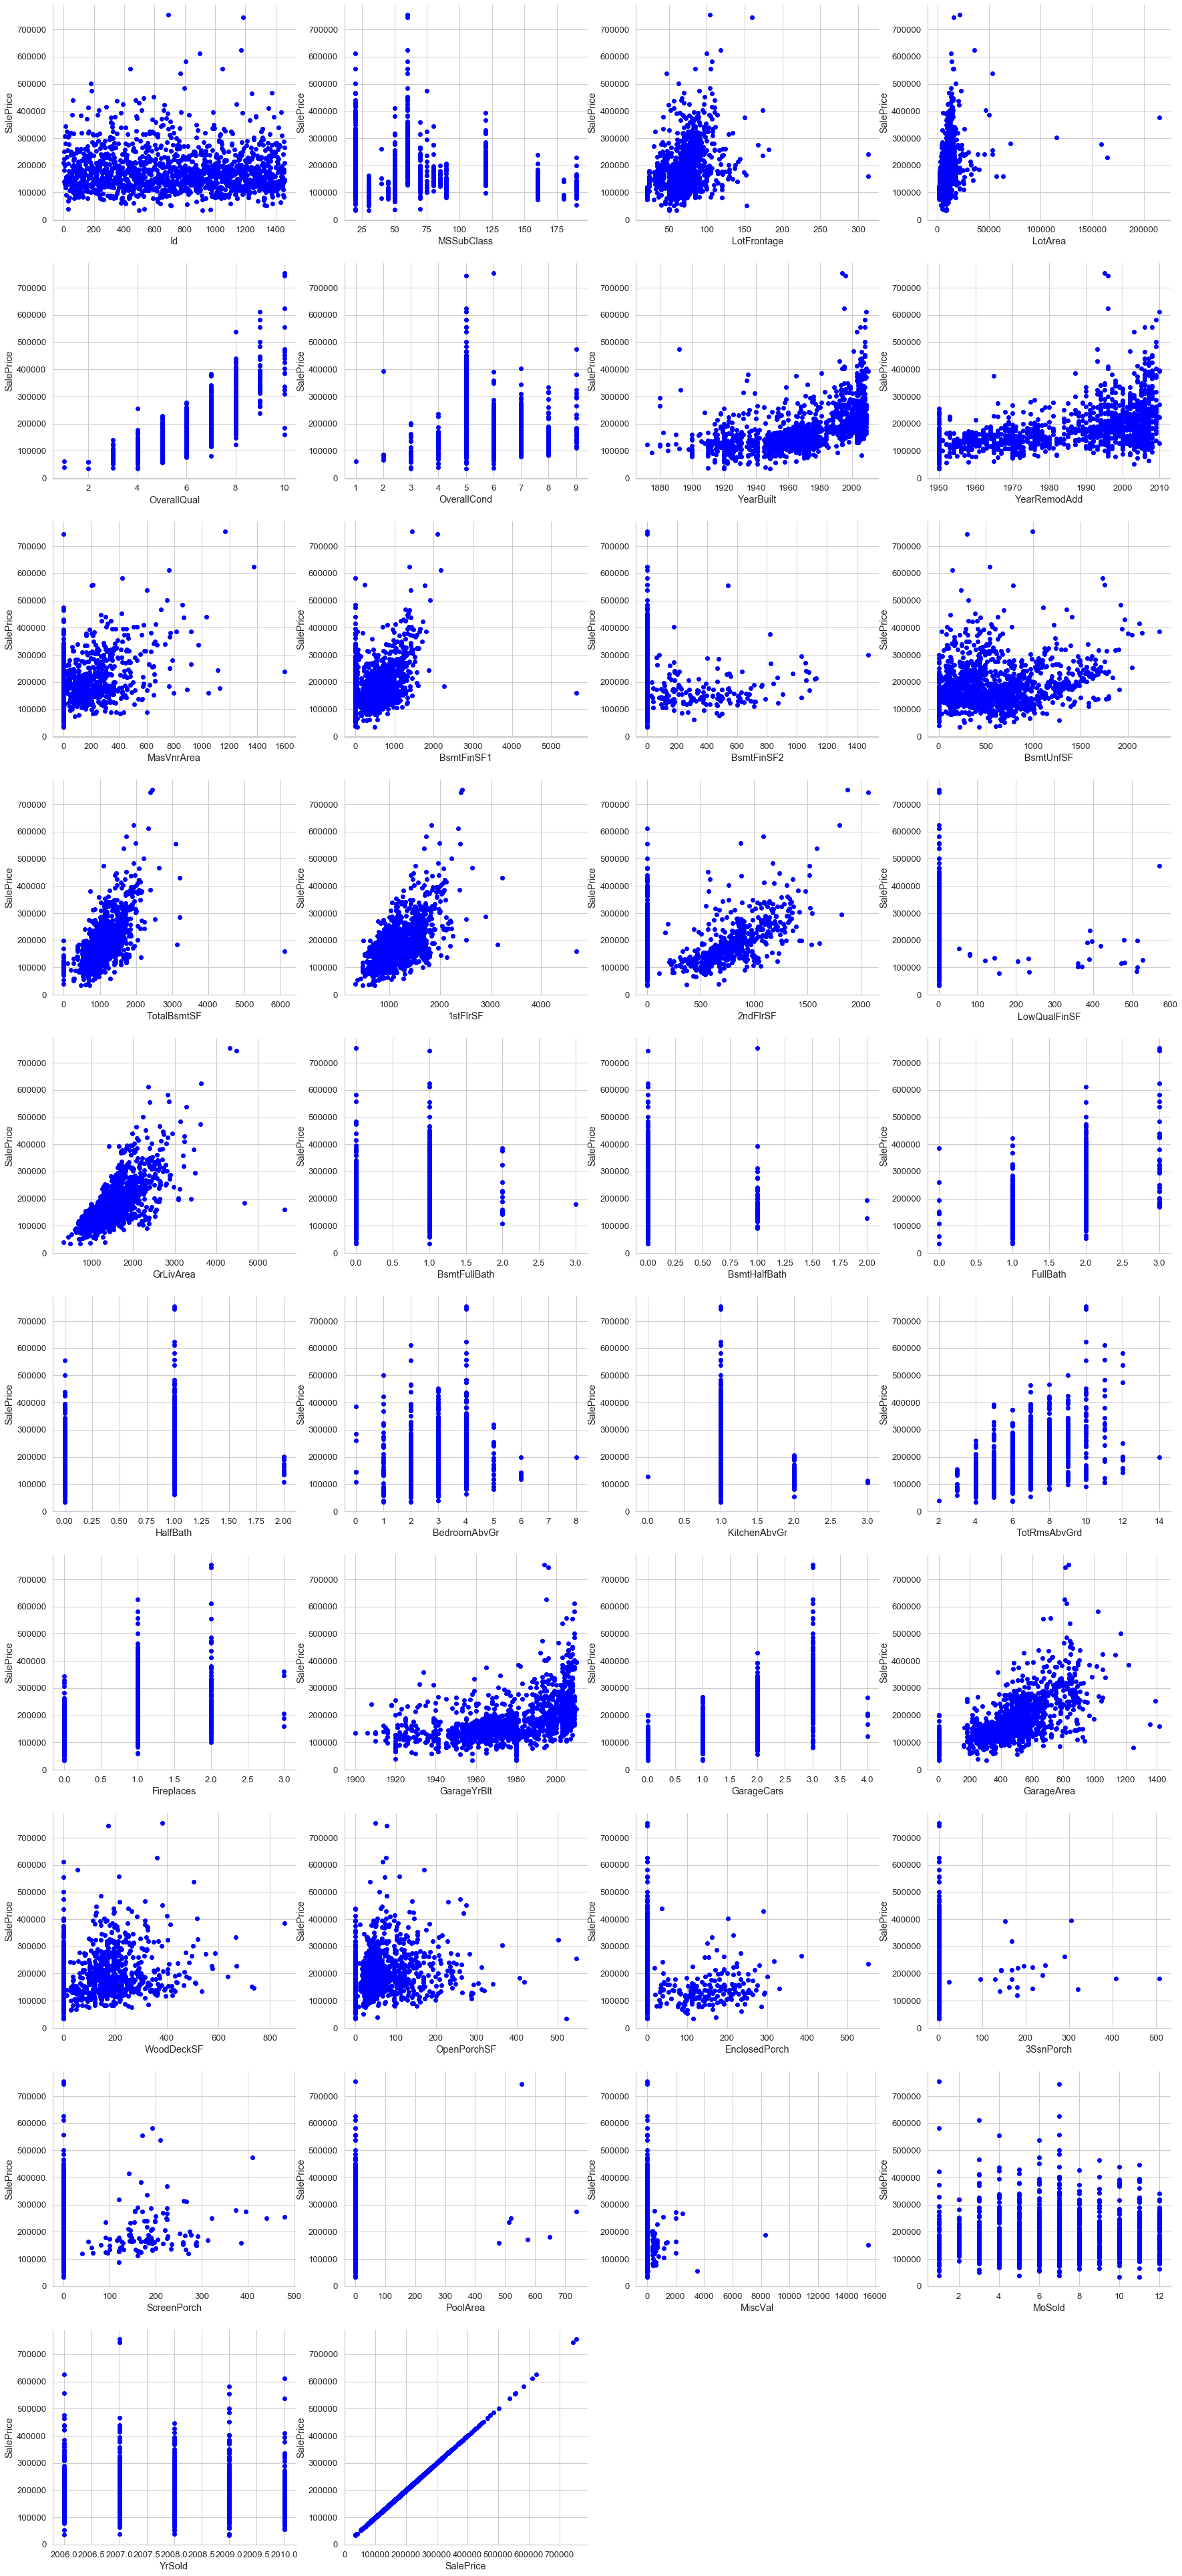

In [16]:
plt.figure(figsize=(30, 70))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(numerical):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=df, x=features, y='SalePrice', color ="blue")
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    
    
sns.despine()

From the graphs above, we can see that several variables have high outliers. Linear regression can be very sensible to outliers, so we need to take care of this.

We will replace these outliers by Q3+1.5*IQR.

In [17]:
Q1 = df.LotFrontage.quantile(0.25)
Q3 = df.LotFrontage.quantile(0.75)
IQR = Q3 - Q1
df.LotFrontage[(df.LotFrontage >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.LotArea.quantile(0.25)
Q3 = df.LotArea.quantile(0.75)
IQR = Q3 - Q1
df.LotArea[(df.LotArea >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.MasVnrArea.quantile(0.25)
Q3 = df.MasVnrArea.quantile(0.75)
IQR = Q3 - Q1
df.MasVnrArea[(df.MasVnrArea >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.BsmtFinSF1.quantile(0.25)
Q3 = df.BsmtFinSF1.quantile(0.75)
IQR = Q3 - Q1
df.BsmtFinSF1[(df.BsmtFinSF1 >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.BsmtFinSF2.quantile(0.25)
Q3 = df.BsmtFinSF2.quantile(0.75)
IQR = Q3 - Q1
df.BsmtFinSF2[(df.BsmtFinSF2 >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.TotalBsmtSF.quantile(0.25)
Q3 = df.TotalBsmtSF.quantile(0.75)
IQR = Q3 - Q1
df.TotalBsmtSF[(df.TotalBsmtSF >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df['1stFlrSF'].quantile(0.25)
Q3 = df['1stFlrSF'].quantile(0.75)
IQR = Q3 - Q1
df['1stFlrSF'][(df['1stFlrSF'] >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.GrLivArea.quantile(0.25)
Q3 = df.GrLivArea.quantile(0.75)
IQR = Q3 - Q1
df.GrLivArea[(df.GrLivArea >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.GarageArea.quantile(0.25)
Q3 = df.GarageArea.quantile(0.75)
IQR = Q3 - Q1
df.GarageArea[(df.GarageArea >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.OpenPorchSF.quantile(0.25)
Q3 = df.OpenPorchSF.quantile(0.75)
IQR = Q3 - Q1
df.OpenPorchSF[(df.OpenPorchSF >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.WoodDeckSF.quantile(0.25)
Q3 = df.WoodDeckSF.quantile(0.75)
IQR = Q3 - Q1
df.WoodDeckSF[(df.WoodDeckSF >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

Q1 = df.EnclosedPorch.quantile(0.25)
Q3 = df.EnclosedPorch.quantile(0.75)
IQR = Q3 - Q1
df.EnclosedPorch[(df.EnclosedPorch >= Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

# Distribution of prices

Let's take a look at the distribution of prices.

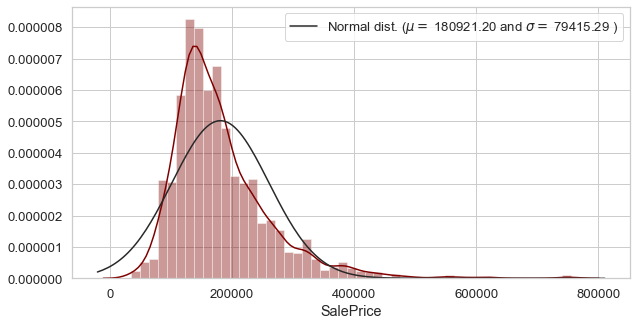

In [18]:
plt.figure(figsize=(10, 5))
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df['SalePrice'] , fit=norm, color='maroon');
(mu, sigma) = norm.fit(df['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.show()

Linear Regression will work best if the price distribution looks more closely to a normal distribution. Let's transform it according to the function:

$$ f(x)=log(1+x) $$

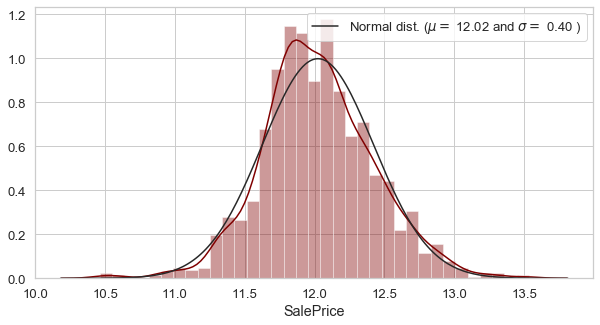

In [19]:
# Now fit the transformed data.
plt.figure(figsize=(10, 5))
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.distplot(df['SalePrice'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(df['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.show()

The transformed Sale prices are nearly normal now. This should help our modeling.

In [20]:
year = [feature for feature in numerical if 'Mo' in feature or 'Yr' in feature or 'Year' in feature]
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [21]:
#if it is more than 1 or -1 it is highly skewed and between 0.5 and 1 it is moderatly skewed, between 0.5 and 0 it is almost symmetric
categorical_num = [feature for feature in numerical if len(df[feature].unique())<20 and feature not in year+['Id']]

continuous = [feature for feature in numerical if len(df[feature]) and feature not in year+['Id']+categorical_num]

skewed_clm = df[continuous].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_clm = skewed_clm[skewed_clm > 0.75]
skewed_clm = skewed_clm.index

df[skewed_clm] = np.log1p(df[skewed_clm])

Use dummy variables for categorical ones.

In [22]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)

In [23]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
del df['TotalBsmtSF']
del df['1stFlrSF']
del df['2ndFlrSF']
del df['Id'] # Id is just an id, it does not provide information to the regression.

# Training

We will train a number of different models: Linear regression, Lasso, Ridge regression, and a random forest.

We will evaluate performance and keep the best model. Let's define our input matrix X and our target y.

In [24]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

$\textbf{Feature selection}$

Before we fit the data to models, let's do feature selection (backward elimination) on a linear model. This is not necessary for a random forest, since at each node only a subset of features are considered.

In [25]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
selected_columns = X.columns
data_modeled, selected_columns = backwardElimination(X.values, y.values, SL, selected_columns)

In [26]:
print('We reduced the features from {} to {}.'.format(len(X.columns),len(selected_columns)))

We reduced the features from 257 to 93.


Train/test split of the dataset.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, test_size=0.2, random_state=4)

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

Let's define a function that calculates some metrics: MAE, MSE, RMSE, and $R^2$.

We will also save the RMSE and percent error for each model.

In [29]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
rmse_per_model_test = []
rmse_per_model_train = []

percent_error_per_model_test =[]
percent_error_per_model_train =[]

# Linear Regression

Let's fit our data to multiple linear regression model. 

In [30]:
lm = LinearRegression()

lm.fit(X_train, y_train)

test_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Test percent error: ', np.mean(abs((y_test)-test_pred)/(y_test)))

print('\n')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

print('Train percent error: ', np.mean(abs(y_train-train_pred)/y_train))

rmse_per_model_test.append(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
rmse_per_model_train.append(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
percent_error_per_model_test.append(np.mean(abs((y_test)-test_pred)/(y_test)))
percent_error_per_model_train.append(np.mean(abs(y_train-train_pred)/y_train))

Test set evaluation:

MAE: 0.07860224862276298
MSE: 0.01882358343947141
RMSE: 0.13719906500946502
R2 Square 0.8688609917934564
Test percent error:  0.00656917967010427


Train set evaluation:

MAE: 0.0708233321754097
MSE: 0.009637677986158385
RMSE: 0.0981716760891775
R2 Square 0.9410245347241168
Train percent error:  0.005927406042612638


# Ridge regression

Let's fit the data to a linear regression model that includes an L2 penalty on weights. 

In [31]:
ridge = RidgeCV(alphas = [1, 0.1, 0.001, 0.0005]) # Evaluate more than one alpha.
ridge.fit(X_train, y_train)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Test percent error: ', np.mean(abs((y_test)-test_pred)/(y_test)))

print('\n')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

print('Train percent error: ', np.mean(abs(y_train-train_pred)/y_train))

rmse_per_model_test.append(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
rmse_per_model_train.append(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
percent_error_per_model_test.append(np.mean(abs((y_test)-test_pred)/(y_test)))
percent_error_per_model_train.append(np.mean(abs(y_train-train_pred)/y_train))

Test set evaluation:

MAE: 0.07219741393049238
MSE: 0.010636150510885884
RMSE: 0.10313171437965087
R2 Square 0.9259007067587199
Test percent error:  0.006016876478653081


Train set evaluation:

MAE: 0.07344363415873265
MSE: 0.011221381565568223
RMSE: 0.1059310226778172
R2 Square 0.9313334394635242
Train percent error:  0.006149237470969617


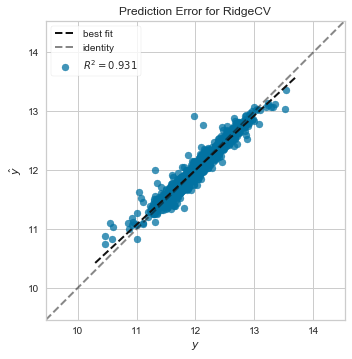

In [32]:
from yellowbrick.regressor import PredictionError
vis = PredictionError(ridge)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

# Lasso

Lasso is linear regression with L1 penalty on weights. Let's what results it gives.

In [33]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Test percent error: ', np.mean(abs((y_test)-test_pred)/(y_test)))

print('\n')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('Train percent error: ', np.mean(abs(y_train-train_pred)/y_train))

rmse_per_model_test.append(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
rmse_per_model_train.append(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
percent_error_per_model_test.append(np.mean(abs((y_test)-test_pred)/(y_test)))
percent_error_per_model_train.append(np.mean(abs(y_train-train_pred)/y_train))

Test set evaluation:

MAE: 0.0749643771297509
MSE: 0.010847124700072127
RMSE: 0.10414953048416553
R2 Square 0.9244309044750034
Test percent error:  0.006237624275234184


Train set evaluation:

MAE: 0.08096555607027918
MSE: 0.01480194506658717
RMSE: 0.12166324451775552
R2 Square 0.9094230375258674
Train percent error:  0.006781816813420811


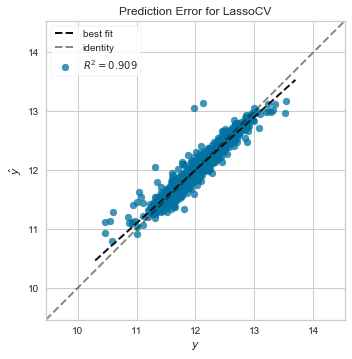

In [34]:
from yellowbrick.regressor import PredictionError
vis = PredictionError(lasso)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

# ElasticNet 

ElasticNet is also a linear model but combines L1 and L2 penalties on weights.

In [35]:
E_model = ElasticNetCV(alphas = [1, 0.1, 0.001, 0.0005])
E_model.fit(X_train, y_train)

test_pred = E_model.predict(X_test)
train_pred = E_model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Test percent error: ', np.mean(abs((y_test)-test_pred)/(y_test)))

print('\n')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

print('Train percent error: ', np.mean(abs(y_train-train_pred)/y_train))

rmse_per_model_test.append(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
rmse_per_model_train.append(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
percent_error_per_model_test.append(np.mean(abs((y_test)-test_pred)/(y_test)))
percent_error_per_model_train.append(np.mean(abs(y_train-train_pred)/y_train))

Test set evaluation:

MAE: 0.07433032620050914
MSE: 0.010721133305820299
RMSE: 0.10354290562766866
R2 Square 0.9253086537376702
Test percent error:  0.006189668874162413


Train set evaluation:

MAE: 0.07818587338972886
MSE: 0.013506372951384581
RMSE: 0.11621692196657327
R2 Square 0.917350981207143
Train percent error:  0.0065538465557110365


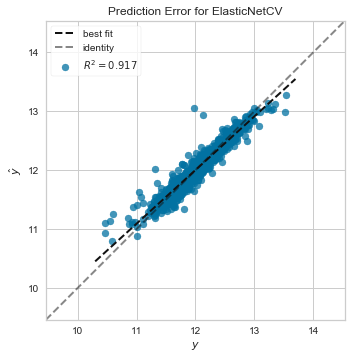

In [36]:
from yellowbrick.regressor import PredictionError
vis = PredictionError(E_model)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

# Random Forest Regression

Let's see how well a random forest performs on this dataset.

In [37]:
from sklearn.ensemble import RandomForestRegressor
  
# create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 1,
                                 criterion='mae')
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

train_pred = np.expm1(regressor.predict(X_train))
test_pred = np.expm1(regressor.predict(X_test))

print('Test set evaluation:\n')
print_evaluate(np.expm1(y_test), test_pred)
print('Test percent error: ', np.mean(abs(np.expm1(y_test)-test_pred)/np.expm1(y_test)))

print('\n')
print('Train set evaluation:\n')
print_evaluate(np.expm1(y_train),train_pred)
print('Train percent error: ', np.mean(abs(np.expm1(y_train)-train_pred)/np.expm1(y_train)))

rmse_per_model_test.append(np.sqrt(metrics.mean_squared_error(np.expm1(y_test), test_pred)))
rmse_per_model_train.append(np.sqrt(metrics.mean_squared_error(np.expm1(y_train), train_pred)))
percent_error_per_model_test.append(np.mean(abs(np.expm1(y_test)-test_pred)/np.expm1(y_test)))
percent_error_per_model_train.append(np.mean(abs(np.expm1(y_train)-train_pred)/np.expm1(y_train)))

Test set evaluation:

MAE: 16135.258941730159
MSE: 582721708.2316797
RMSE: 24139.629413718838
R2 Square 0.8950431698173689
Test percent error:  0.09002833634273155


Train set evaluation:

MAE: 6786.301953641986
MSE: 150975538.82402682
RMSE: 12287.210375997753
R2 Square 0.9767567214734341
Train percent error:  0.03758056446308251


Let's evaluate the performance of each model.

In [38]:
models = ['Linear Regression','Ridge Regression','LassoCV','ElasticNet','Random Forest']

for i in range(len(models)):
    print('{}'.format(models[i]))
    print('test RMSE: {}'.format(np.round(rmse_per_model_test[i],4)))
    print('train RMSE: {}'.format(np.round(rmse_per_model_train[i],4)))
    print('test percent error: {}%'.format(np.round(100*percent_error_per_model_test[i],3)))
    print('train percent error: {}%'.format(np.round(100*percent_error_per_model_train[i],3)))
    print('\n')


Linear Regression
test RMSE: 0.1372
train RMSE: 0.0982
test percent error: 0.657%
train percent error: 0.593%


Ridge Regression
test RMSE: 0.1031
train RMSE: 0.1059
test percent error: 0.602%
train percent error: 0.615%


LassoCV
test RMSE: 0.1041
train RMSE: 0.1217
test percent error: 0.624%
train percent error: 0.678%


ElasticNet
test RMSE: 0.1035
train RMSE: 0.1162
test percent error: 0.619%
train percent error: 0.655%


Random Forest
test RMSE: 24139.6294
train RMSE: 12287.2104
test percent error: 9.003%
train percent error: 3.758%




# Conclusion

Linear models seem to perform best after we take care of multicollinearity, feature selection, outliers, etc. The best performing model here is Ridge regression (linear regression + L2 penalty). We see that more complex models such as a random forest do not perform as well and are unnecessary.

The error rate of our best model is 0.602%. That means that, on average, our predictions using this model will only be 0.602% away from the true value, which is pretty great!